# **Minor Project: Student Performance and Attendance Analyzer**

**Problem Statement**:-

Educational institutions need to analyze student performance and attendance to identify patterns, weak
areas, and overall outcomes.
This project analyzes academic records to support data-driven decisions.

In [1]:
# Load the student dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("/content/Week-2 Minor Project Dataset.xlsx")


In [2]:
# Inspect and clean the data
print("Dataset Shape:",df.shape)
print("\nColumns:\n",df.columns)
print("\nData Types:\n",df.dtypes)

print("\nMissing Values:\n", df.isnull().sum())

df['GPA'] = df['GPA'].fillna(df['GPA'].mean())
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].mean())

Dataset Shape: (100, 16)

Columns:
 Index(['Name', 'Gender', 'Phone Number', 'State Of Birth', 'Email',
       'Student ID', 'Qualification', 'Course', 'Semester', 'GPA', 'CGPA',
       'Raised Hands', 'Visited Resource', 'Announcements Visited',
       'Discussion', 'Absence Days Under-7'],
      dtype='object')

Data Types:
 Name                      object
Gender                    object
Phone Number              object
State Of Birth            object
Email                     object
Student ID                object
Qualification             object
Course                    object
Semester                  object
GPA                      float64
CGPA                     float64
Raised Hands              object
Visited Resource           int64
Announcements Visited      int64
Discussion                 int64
Absence Days Under-7       int64
dtype: object

Missing Values:
 Name                     0
Gender                   0
Phone Number             0
State Of Birth           0
Ema

In [3]:
# Analyze overall performance statistics
print("\nGPA Statistics:\n", df['GPA'].describe())
print("\nCGPA Statistics:\n", df['CGPA'].describe())


GPA Statistics:
 count    100.000000
mean       3.351890
std        0.359059
min        2.323000
25%        3.116000
50%        3.333000
75%        3.612750
max        4.000000
Name: GPA, dtype: float64

CGPA Statistics:
 count    100.000000
mean       3.297080
std        0.386223
min        2.319000
25%        3.086750
50%        3.335000
75%        3.562000
max        3.939000
Name: CGPA, dtype: float64


In [4]:
# Perform group-based analysis (by subject or attendance)

def attendance_category(days):
    if days <= 3:
        return "Low Absence"
    elif days <= 7:
        return "Moderate Absence"
    else:
        return "High Absence"

df['Attendance_Category'] = df['Absence Days Under-7'].apply(attendance_category)

attendance_gpa = df.groupby('Attendance_Category')['GPA'].mean()
print("\nGPA based on Attendance:\n", attendance_gpa)


GPA based on Attendance:
 Attendance_Category
Low Absence    3.35189
Name: GPA, dtype: float64


In [5]:
engagement_cols = [
    'Raised Hands',
    'Visited Resource',
    'Discussion',
    'Announcements Visited'
]

# Convert 'Raised Hands' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Raised Hands'] = pd.to_numeric(df['Raised Hands'], errors='coerce').fillna(0)

engagement_analysis = df[engagement_cols + ['GPA']].corr()
print("\nEngagement vs GPA Correlation:\n", engagement_analysis['GPA'])


Engagement vs GPA Correlation:
 Raised Hands             0.886960
Visited Resource         0.883369
Discussion               0.876826
Announcements Visited    0.879286
GPA                      1.000000
Name: GPA, dtype: float64


In [6]:
course_performance = df.groupby('Course')['CGPA'].mean()
print("\nAverage CGPA Course-wise:\n", course_performance)


Average CGPA Course-wise:
 Course
Accounting                3.213917
Business                  3.344700
Computer Science          3.319125
Hotel Management          3.354400
Human Resource Manager    3.480571
Information Technology    3.308600
Marketing                 3.291500
Science                   2.839750
Name: CGPA, dtype: float64


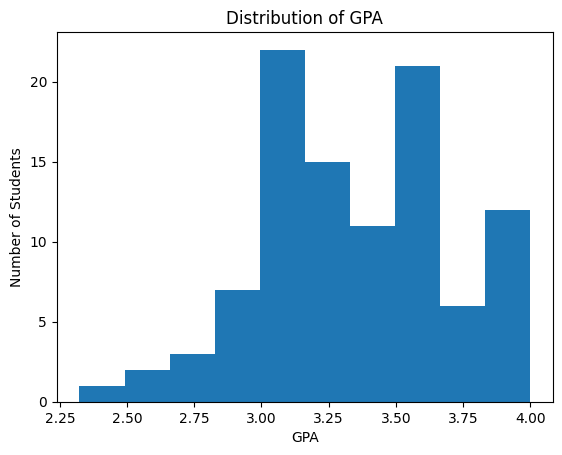

In [7]:
# Visualize distributions and comparisons

# GPA Distribution
plt.figure()
plt.hist(df['GPA'], bins=10)
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.show()

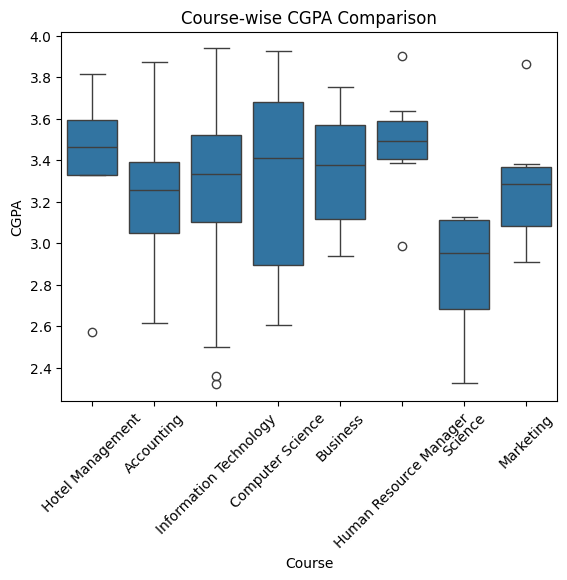

In [8]:
# Course-wise CGPA Boxplot
plt.figure()
sns.boxplot(x='Course', y='CGPA', data=df)
plt.title("Course-wise CGPA Comparison")
plt.xticks(rotation=45)
plt.show()

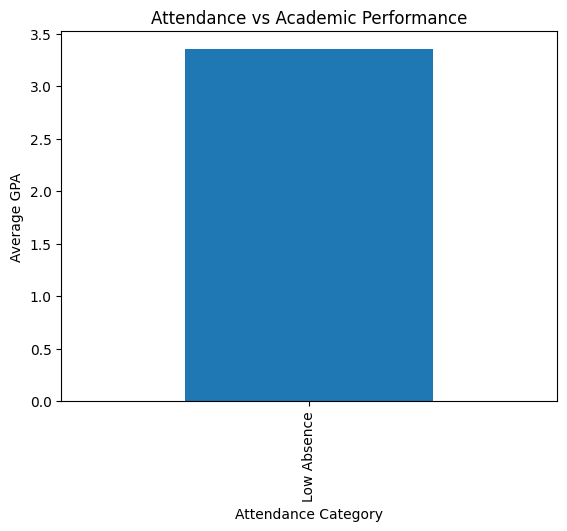

In [9]:
# Attendance vs GPA
plt.figure()
attendance_gpa.plot(kind='bar')
plt.title("Attendance vs Academic Performance")
plt.xlabel("Attendance Category")
plt.ylabel("Average GPA")
plt.show()

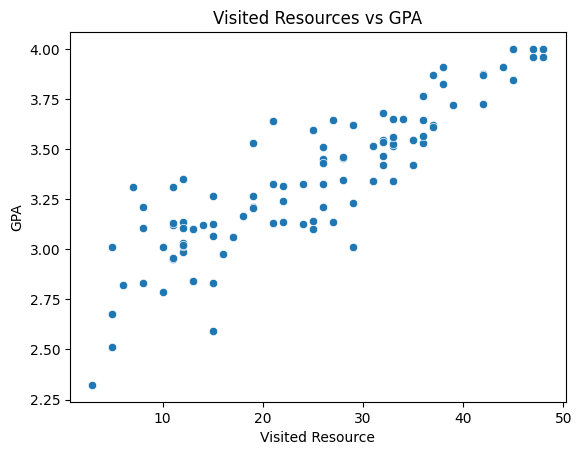

In [10]:
# Engagement vs GPA
plt.figure()
sns.scatterplot(x='Visited Resource', y='GPA', data=df)
plt.title("Visited Resources vs GPA")
plt.show()

In [11]:
# Interpret results and academic insights

print("\nFinal Academic Insights:")
print("- Higher engagement (raised hands, resources, discussion) improves GPA.")
print("- Students with fewer absence days perform better academically.")
print("- Course-wise CGPA comparison shows variation in performance.")


Final Academic Insights:
- Higher engagement (raised hands, resources, discussion) improves GPA.
- Students with fewer absence days perform better academically.
- Course-wise CGPA comparison shows variation in performance.
